In [2]:
#This code is to investigate the relationship between COD and volume fraction



# open the data file
file = open("iops_human1.txt")
# read the file as a list
iops_human1 = file.readlines()
# close the file
file.close()


In [3]:
#process the input data: "IOP file"
import re

absorption_coeff1_1 = []
absorption_coeff1_2 = []
absorption_coeff1_3 = []
absorption_coeff1_4 = []
scattering_coeff1_1 = []
scattering_coeff1_2 = []
scattering_coeff1_3 = []
scattering_coeff1_4 = []
optical_depth_1 = []

for row in iops_human1:
    if row.find("Absorption")>=0:
        absorption_coeff1_1.append(row)
    elif row.find("Scaled scattering coeff")>=0:
        scattering_coeff1_1.append(row)
        
#Filtering just the numbers from the strings

for row in absorption_coeff1_1:
    number = [i for i in re.findall('\d+\.\d+',row)]
#    number = [int(i) for i in re.findall(r'\d+',row)]
    absorption_coeff1_2.append(number)
    
for row in scattering_coeff1_1:
    number = [i for i in re.findall('\d+\.\d+',row)]
#    number = [int(i) for i in re.findall(r'\d+',row)]
    scattering_coeff1_2.append(number)


#filter every third element from the list:

for i in range(len(absorption_coeff1_2)):
    if i%6 == 3:
        absorption_coeff1_3.append(absorption_coeff1_2[i])
        
for i in range(len(scattering_coeff1_2)):
    if i%3 == 1:
        scattering_coeff1_3.append(scattering_coeff1_2[i])
        
for item in absorption_coeff1_3:
    absorption_coeff1_4.append(float(item[0]))
    
for item in scattering_coeff1_3:
    scattering_coeff1_4.append(float(item[0]))
        
#calculating optical depth from scattering coefficient and from absorption coefficient
#optical depth = (scatt_coeff + absor_coeff)*thickness

thickness = 2000
for i in range(len(absorption_coeff1_4)):
    optical_depth_1.append(thickness*(absorption_coeff1_4[i]+scattering_coeff1_4[i]))
        

#print(optical_depth_1)




In [4]:
# open the data file
file = open("iops_human2.txt")
# read the file as a list
iops_human2 = file.readlines()
# close the file
file.close()

In [5]:
#process the input data: "IOP file"
import re

absorption_coeff2_1 = []
absorption_coeff2_2 = []
absorption_coeff2_3 = []
absorption_coeff2_4 = []
scattering_coeff2_1 = []
scattering_coeff2_2 = []
scattering_coeff2_3 = []
scattering_coeff2_4 = []
optical_depth_2 = []

for row in iops_human2:
    if row.find("Absorption")>=0:
        absorption_coeff2_1.append(row)
    elif row.find("Scaled scattering coeff")>=0:
        scattering_coeff2_1.append(row)
        
#Filtering just the numbers from the strings

for row in absorption_coeff2_1:
    number = [i for i in re.findall('\d+\.\d+',row)]
#    number = [int(i) for i in re.findall(r'\d+',row)]
    absorption_coeff2_2.append(number)
    
for row in scattering_coeff2_1:
    number = [i for i in re.findall('\d+\.\d+',row)]
#    number = [int(i) for i in re.findall(r'\d+',row)]
    scattering_coeff2_2.append(number)


#filter every third element from the list:

for i in range(len(absorption_coeff2_2)):
    if i%6 == 3:
        absorption_coeff2_3.append(absorption_coeff2_2[i])
        
for i in range(len(scattering_coeff2_2)):
    if i%3 == 1:
        scattering_coeff2_3.append(scattering_coeff2_2[i])
        
for item in absorption_coeff2_3:
    absorption_coeff2_4.append(float(item[0]))
    
for item in scattering_coeff2_3:
    scattering_coeff2_4.append(float(item[0]))
        
#calculating optical depth from scattering coefficient and from absorption coefficient
#optical depth = (scatt_coeff + absor_coeff)*thickness

thickness = 2000
for i in range(len(absorption_coeff2_4)):
    optical_depth_2.append(thickness*(absorption_coeff2_4[i]+scattering_coeff2_4[i]))
        

#print(optical_depth_2)


In [6]:
#process data: "cloud_profile" file
file = open("cloud_profile.txt")
# read the file as a list
data2 = file.readlines()
# close the file
file.close()

volume_fraction = []
volume_fraction2 = []

for item in data2:
    chunks = item.split(' ')
    volume_fraction.append(chunks)
    
for item in volume_fraction:
    volume_fraction2.append(float(item[2]))
    
#print(data2)
#print(volume_fraction2)

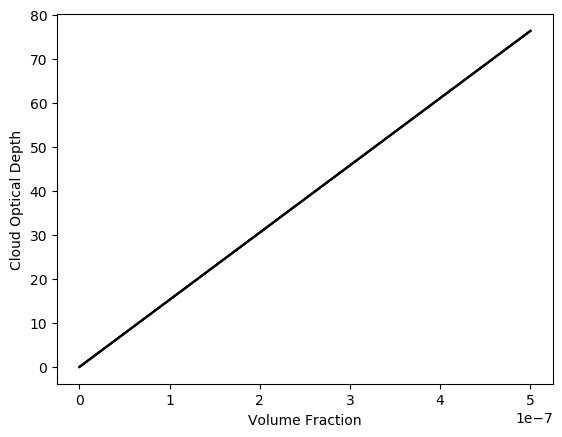

152596238.21432063
-2.4655832930875476e-12


In [9]:
#plot volume fration VS iop function
import matplotlib.pyplot as plt
import math
from scipy import stats

#linear regression
slope_1, intercept_1, r_1, p_1, std_err_1 = stats.linregress(volume_fraction2, optical_depth_1)
slope_2, intercept_2, r_2, p_2, std_err_2 = stats.linregress(volume_fraction2, optical_depth_2)

def myfunc_1(x):
  return slope_1 * x + intercept_1

def myfunc_2(x):
  return slope_2 * x + intercept_2

#mymodel1 = list(map(myfunc_1, volume_fraction2))
#mymodel2 = list(map(myfunc_2, volume_fraction2))

#plt.plot(volume_fraction2,optical_depth_1, color='black')
plt.plot(volume_fraction2, optical_depth_2, color='black')
#plt.plot(volume_fraction2, mymodel)
#plt.ylim(0,0.0000000110000000)
#plt.xlim(0,3.2)
plt.xlabel('Volume Fraction')
plt.ylabel('Cloud Optical Depth')
#plt.legend(['b','a'])
#plt.show()
#import mathplt.show()

#OPTICAL_DEPTH_1 IS @ 340 nm
#OPTICAL_DEPTH_2 IS @ 380 nm

plt.savefig('COD_VS_Volf.pdf', dpi = 300)
plt.show()
#print(slope_1)
#print(intercept_1)
print(slope_2)
print(intercept_2)